In [8]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit import IBMQ

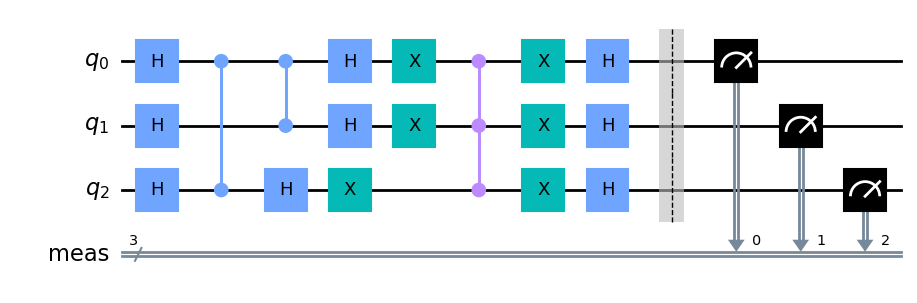

In [18]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2, 1, 0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)

grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

In [14]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-21 14:47:48,963: Credentials are already in use. The existing account in the session will be replaced.


/Users/adam/Documents/Cours/5eme Annee/2eme Session/LOG6953C/LOG6953C_TPs/TP3/env/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/adam/Documents/Cours/5eme Annee/2eme Session/LOG6953C/LOG6953C_TPs/TP3/env/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


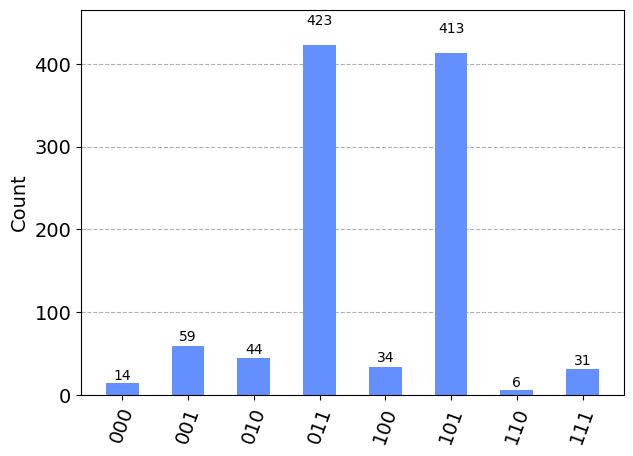

In [19]:
from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi

device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, sim_nairo, optimization_level=3)
job=execute(grover_circuit, sim_nairo, shots=1024)

# Get the results from the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)